In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

### Setup - Preprocessed Data 
randomly split dataset into train and test set <br>
by using `pandas` and `sklearn.model_selection`

In [2]:
data = pd.read_csv("winequalityred.csv", sep=";")
y = ["quality"]
x = data.drop(y, axis=1).columns.values

print("features: ", x)
print("target: ", y)
print("data shape: ", data.shape)
data.head(3)

features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
target:  ['quality']
data shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
kf = KFold(shuffle=True, n_splits=5)
for trainIdx, testIdx in kf.split(data):
    X_train, X_test = data[x].iloc[trainIdx], data[x].iloc[testIdx]
    y_train, y_test = data[y].iloc[trainIdx], data[y].iloc[testIdx]

In [4]:
print(X_train.shape, y_train.shape)
pd.concat([X_train.head(3), y_train.head(3)], axis=1)

(1280, 11) (1280, 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [5]:
print(X_test.shape, y_test.shape)
pd.concat([X_test.head(3), y_test.head(3)], axis=1)

(319, 11) (319, 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


### Regression equations and functions
1. adding intercept
2. the equation for a the linear model that predicts y from X
3. the equation for computing the Residual Sum of Squares (RSS) for the linear model

by using `pandas` and `numpy`

In [6]:
def predict(beta, X):
    if isinstance(beta, (pd.DataFrame, pd.Series)):
        beta = beta.values
    
    if isinstance(X, (pd.DataFrame, pd.Series)):
        index = X.index.values
        X = X.values
    
    if beta.shape[0] - X.shape[1] == 1:
        X = np.concatenate([np.ones(shape=(X.shape[0], 1)), X], axis=1)
    
    return pd.DataFrame(np.matmul(X, beta), index=index, columns=["y_hat"])


def RSS(beta, X, y):
    tmp = pd.concat([y, predict(beta, X)], axis=1)
    
    if pd.isnull(tmp).any(axis=1).sum():
        raise ValueError("y and y_hat indexes are mismatched")
        
    return tmp.apply(lambda s: (s[0] - s[1])**2, axis=1).sum()

### Training Models
by using `pandas` and `scipy.optimize`

In [7]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
beta_hat = opt.x

In [8]:
beta_hat

array([ 1.55080001e+01,  2.93304800e-02, -1.10164498e+00, -2.48966353e-01,
        7.53835560e-03, -2.09771773e+00,  8.22597164e-03, -4.08705329e-03,
       -1.14357216e+01, -4.51139176e-01,  9.22558674e-01,  2.92520021e-01])

In [9]:
RSS(beta_hat, X_train, y_train)

529.2355703132519

### Question

What are the qualitative results from your model? <br>
Which features seem to be most important? <br>
Do you think that the magnitude of the features in X may affect the results <br>
(for example, the average total sulfur dioxide across all wines is 46.47, <br>
 but the average chlorides is only 0.087).

<BarContainer object of 11 artists>

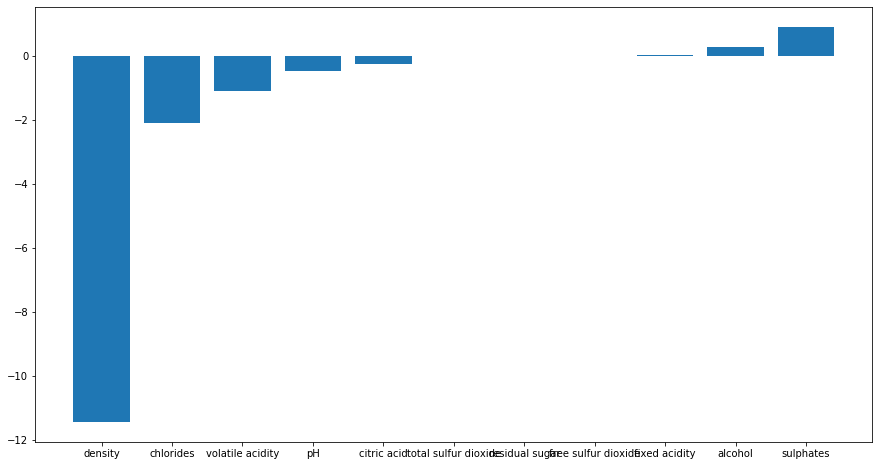

In [10]:
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns[np.argsort(beta_hat[1:])], np.sort(beta_hat[1:]), align="center")
# plt.bar(X_train.columns, beta_hat, align="center")

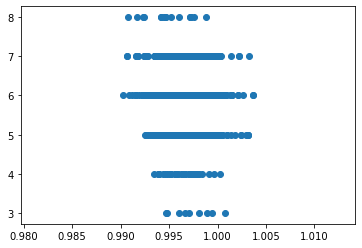

In [11]:
plt.scatter(X_train["density"], y_train)

How well does your model fit? <br>
You should be able to measure the goodness of fit, RSS, <br>
on both the training data and the test data, <br>
but only report the results on the test data. <br>
<br>
In Machine Learning we almost always only care about<br> 
how well the model fits on data that has not been used to fit the model, <br>
because we need to use the model in the future, not the past. <br>
Therefore, we only report performance with holdout data, or test data.

In [12]:
print("RSS in test set: ", RSS(beta_hat, X_test, y_test))

RSS in test set:  139.52309407821596


Does the end result or RSS change if you try different initial values of β? <br>
What happens if you change the magnitude of the initial β?

In [13]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS: ", RSS(new_beta_hat, X_train, y_train))

new init beta:  [ 0.0712659  -0.34043644 -0.2483467   2.00195236 -1.05777992 -0.93002838
  0.60361398  0.91011419  0.36218346 -0.7770279  -0.41191242  0.44733232] 

the diff between new beta hat and beta hat [-8.76181779e-04 -7.06208904e-07 -1.73858299e-06 -1.70850304e-06
 -3.95578966e-07  4.03184774e-06  8.20827624e-09  3.70453658e-09
  8.92532597e-04 -4.08736617e-06 -2.09526157e-06  8.91903130e-07] 

new RSS:  529.2355703120979


In [14]:
beta = np.random.normal(100, 10, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS: ", RSS(new_beta_hat, X_train, y_train))

new init beta:  [105.55589182  84.47410368  96.5593881   96.08210464  95.67356822
  95.76178772 117.42325434  80.45403812 117.16018879 126.2042631
  98.51593789 111.03191417] 

the diff between new beta hat and beta hat [-4.05782366e-04 -3.24361837e-07  4.88928409e-07  5.31623565e-07
 -1.93323865e-07  3.95039312e-06  5.68410737e-09 -3.12358405e-09
  4.07453747e-04 -5.90207628e-07 -4.64882346e-07  4.13894915e-07] 

new RSS:  529.2355703126951


Does the choice of solver method change the end result or RSS? 

In [15]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train), method="Powell")
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS: ", RSS(new_beta_hat, X_train, y_train))

new init beta:  [ 1.43709917e+00  1.10423750e+00 -1.31550747e+00 -2.54014802e-01
 -2.10391308e-01  5.96391849e-01  1.24925024e+00  4.56756149e-01
 -1.23795603e-01 -6.20483456e-04  9.15552915e-01 -3.10089138e+00] 

the diff between new beta hat and beta hat [-4.69735319e+01 -4.44105959e-02 -3.59452439e-02 -9.16692939e-03
 -2.07494882e-02 -7.71902046e-02  5.68145398e-04 -1.92137008e-04
  4.79477273e+01 -2.36737004e-01 -6.38855173e-02  4.38880665e-02] 

new RSS:  530.8642091206292


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.intercept_, lr.coef_

(array([15.50710429]),
 array([[ 2.93307799e-02, -1.10164846e+00, -2.48972533e-01,
          7.53781793e-03, -2.09770362e+00,  8.22591108e-03,
         -4.08699957e-03, -1.14348520e+01, -4.51135758e-01,
          9.22555690e-01,  2.92521865e-01]]))